In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
data=pd.read_csv("prepared_data.csv")
data.head()

,City,Waste_Type,Waste_Generated,Recycling_Rate,Population_Density,Municipal_Efficiency_Score,Disposal_Method,Cost_of_Waste_Management,Awareness_Campaigns_Count,Landfill_Capacity,Year,Landfill_Lat,Landfill_Long,Distance_to_Landfill_km,Years_Since_2019
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,45575,2019,22.4265,77.4931,606.595268,0
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,45575,2019,22.4265,77.4931,606.595268,0
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,45575,2019,22.4265,77.4931,606.595268,0
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,45575,2019,22.4265,77.4931,606.595268,0
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,45575,2019,22.4265,77.4931,606.595268,0


In [13]:
cleaned_data = pd.read_csv("../data/processed/cleaned_data.csv")
cleaned_data.head()

,Waste_Generated,Recycling_Rate,Population_Density,Municipal_Efficiency_Score,Cost_of_Waste_Management,Awareness_Campaigns_Count,Landfill_Capacity,Distance_to_Landfill_km,Years_Since_2019,City_Agra,...,City_Visakhapatnam,Waste_Type_Construction,Waste_Type_E-Waste,Waste_Type_Hazardous,Waste_Type_Organic,Waste_Type_Plastic,Disposal_Method_Composting,Disposal_Method_Incineration,Disposal_Method_Landfill,Disposal_Method_Recycling
0,0.483872,68,-0.34686,0.929612,0.217581,0.674989,-0.688562,-1.620291,-1.414214,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-1.465258,56,-0.34686,-1.394418,-0.000360,0.345348,-0.688562,-1.620291,-1.414214,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.041074,53,-0.34686,0.348604,0.479424,0.510168,-0.688562,-1.620291,-1.414214,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.316444,56,-0.34686,-1.394418,-1.003829,0.674989,-0.688562,-1.620291,-1.414214,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.082665,44,-0.34686,-0.232403,-0.437026,1.004630,-0.688562,-1.620291,-1.414214,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
#Columns in data
cols = [i for i in data.columns if i != "Recycling_Rate"]
cat_cols = [col for col in cols if data[col].dtype =='O' or col == "Year"]
num_cols = [col for col in cols if col not in cat_cols]
target_col = ["Recycling_Rate"]
print(f"We have {len(cat_cols)} Categorical Columns:", cat_cols)
print(f"We have {len(num_cols)} Numerical Columns:", num_cols)
print( "Target Column:", target_col)

We have 4 Categorical Columns: ['City', 'Waste_Type', 'Disposal_Method', 'Year']
We have 10 Numerical Columns: ['Waste_Generated', 'Population_Density', 'Municipal_Efficiency_Score', 'Cost_of_Waste_Management', 'Awareness_Campaigns_Count', 'Landfill_Capacity', 'Landfill_Lat', 'Landfill_Long', 'Distance_to_Landfill_km', 'Years_Since_2019']
Target Column: ['Recycling_Rate']


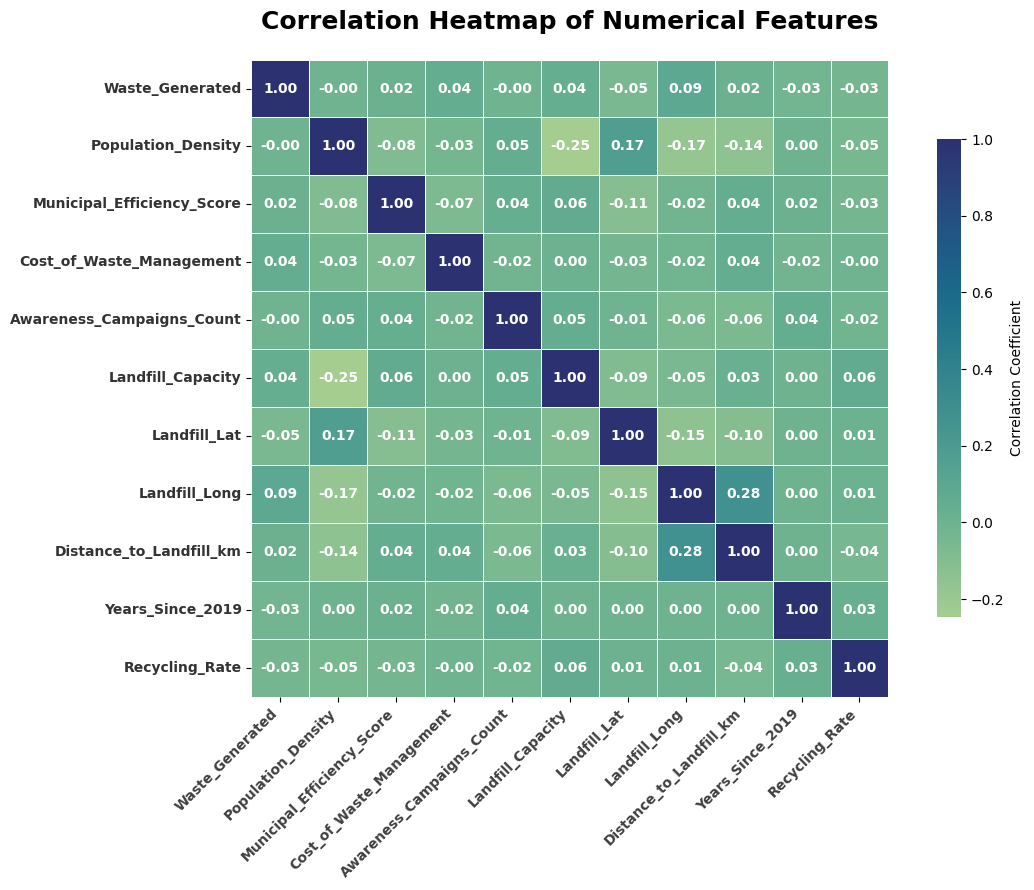

In [15]:
#Understanding the effect of variables on each other
corr_matrix = data[num_cols + target_col].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="crest",
    cbar_kws={
        "shrink": 0.75,
        "label": "Correlation Coefficient",
        "orientation": "vertical"
    },
    linewidths=0.6,
    linecolor="white",
    square=True,
    annot_kws={
        "size": 10,
        "weight": "bold",
        "color": "white"
    }
)

plt.title(
    "Correlation Heatmap of Numerical Features",
    fontsize=18,
    weight='bold',
    pad=22
)

plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10,
    weight='bold',
    color="#0E0F0ECC"
)
plt.yticks(
    rotation=0,
    fontsize=10,
    weight='bold',
    color="#333333"
)

# Remove extra chart frame
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

As from above heat map we can see that there is not much linear relationship between the variables in the data and an absence of multicolinearity

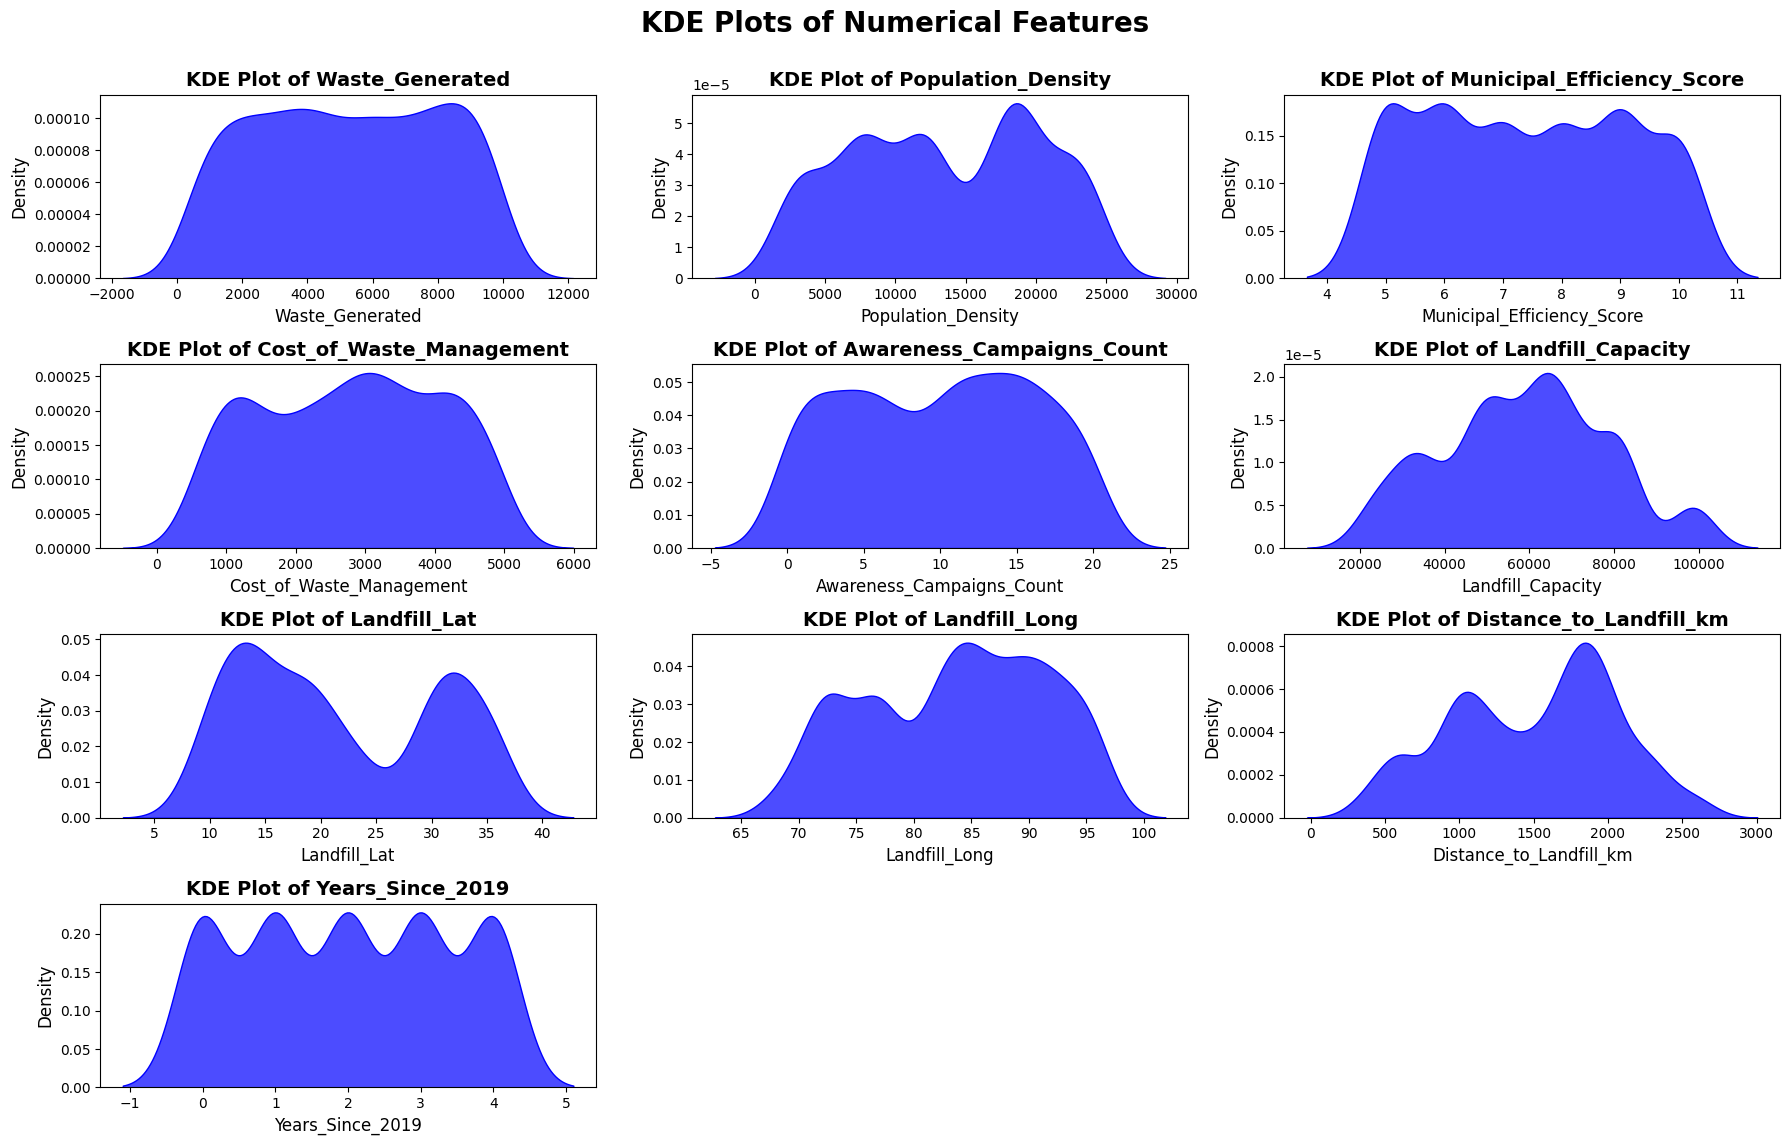

In [16]:
#Creating kde plot for numerical features
plt.figure(figsize=(18, 12))
plt.suptitle("KDE Plots of Numerical Features", fontsize=20, weight='bold', y=0.95)


for i in range(len(num_cols)):
    plt.subplot(4, 3, i + 1)  # 3 rows, 3 columns grid
    sns.kdeplot(data[num_cols[i]], fill=True, color="blue", alpha=0.7)
    plt.title(f"KDE Plot of {num_cols[i]}", fontsize=14, weight='bold')
    plt.xlabel(num_cols[i], fontsize=12,)
    plt.ylabel("Density", fontsize=12)
  

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

## Analysis of KDE Plots

***

### 1. Waste_Generated
* The distribution of **waste generated** is approximately bell-shaped, with the highest density observed between 2000 and 8000 units.
* The peak of the distribution is centered around 5000 units, indicating this is the most common amount of waste generated.

### 2. Population_Density
* The **population density** plot is multi-modal, featuring significant peaks around 12,500 and 20,000 people per square kilometer.
* This suggests that the data may come from areas with a few distinct types of population density.

### 3. Municipal_Efficiency_Score
* The distribution of the **municipal efficiency score** is relatively uniform, ranging from 4 to 11.
* A slight peaks are there but mostly there isn't a strong central tendency.

### 4. Cost_of_Waste_Management
* The **cost of waste management** distribution is also has two-three modes.
* The costs are most concentrated between 2000 and 4000, with a peak around 2500, showing that this is the most common cost.

### 5. Awareness_Campaigns_Count
* The plot for the **count of awareness campaigns** is distinctly multi-modal, with clear peaks at 5, and 15.
* This pattern suggests that campaigns are likely launched in specific, predefined batches or frequencies.

### 6. Landfill_Capacity
* The **landfill capacity** distribution is broad and has multiple peaks, particularly one prominent peak near 35,000 and another around 
60,000 units.
* This indicates the dataset includes landfills of 4 to 5 sizes.

### 7. Landfill_Lat & Landfill_Long (Latitude & Longitude)
* The plots for both **landfill latitude** and **longitude** are multi-modal.
* For latitude, major peaks are seen around 10 and 30.
* For longitude, peaks are present around 70, 85, and 90.
* This suggests that the landfills are not randomly distributed but are instead clustered in specific geographical regions.

### 8. Years_Since_2019
* The **years since 2019** plot displays sharp, distinct peaks at integer values (1, 2, 3, and 4).
* This indicates the data was collected at discrete time points corresponding to specific years, such as 2020, 2021, 2022, and 2023.

In [17]:
#Understanding the distribution of numerical features

for col in num_cols:
    print(f"Column: {col}; Unique Values: {data[col].nunique()}, Mean: {data[col].mean():.3f}, Variance: {data[col].var():.3f}")

Column: Waste_Generated; Unique Values: 807, Mean: 5262.249, Variance: 7767283.914
Column: Population_Density; Unique Values: 33, Mean: 13489.706, Variance: 43971241.786
Column: Municipal_Efficiency_Score; Unique Values: 6, Mean: 7.400, Variance: 2.966
Column: Cost_of_Waste_Management; Unique Values: 780, Mean: 2778.459, Variance: 1629007.113
Column: Awareness_Campaigns_Count; Unique Values: 21, Mean: 9.905, Variance: 36.854
Column: Landfill_Capacity; Unique Values: 34, Mean: 58934.618, Variance: 376888924.618
Column: Landfill_Lat; Unique Values: 34, Mean: 21.672, Variance: 76.650
Column: Landfill_Long; Unique Values: 34, Mean: 83.638, Variance: 59.988
Column: Distance_to_Landfill_km; Unique Values: 34, Mean: 1499.630, Variance: 304131.755
Column: Years_Since_2019; Unique Values: 5, Mean: 2.000, Variance: 2.002


Lets see various temporal trends in the data

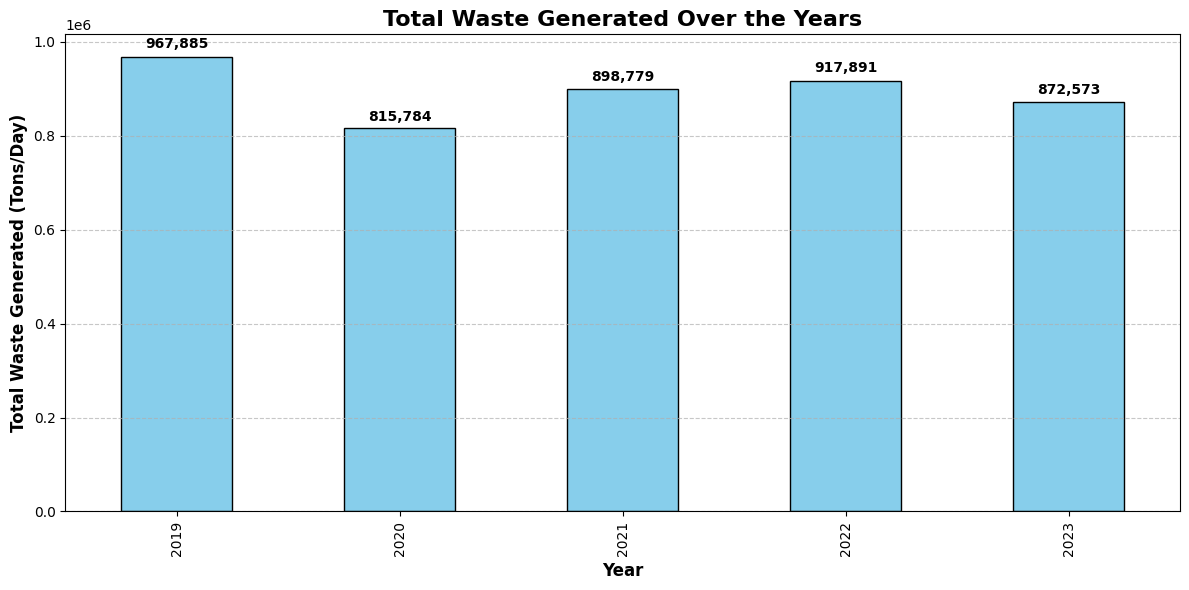

In [18]:
#Waste generated daily versus Year: To show how waste generation changes over the years

waste_per_year = data.groupby("Year")["Waste_Generated"].sum()


plt.figure(figsize=(12, 6))
waste_per_year.plot(
    kind="bar",
    color="skyblue",
    edgecolor="black"
)

# Titles and labels
plt.title("Total Waste Generated Over the Years", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12, weight='bold')
plt.ylabel("Total Waste Generated (Tons/Day)", fontsize=12, weight='bold')

for i, val in enumerate(waste_per_year):
    plt.text(i, val + 0.02 * val, f"{val:,.0f}", ha='center', fontsize=10, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Waste generate over the years appears to have declined after 2019, while being fairly stable after that

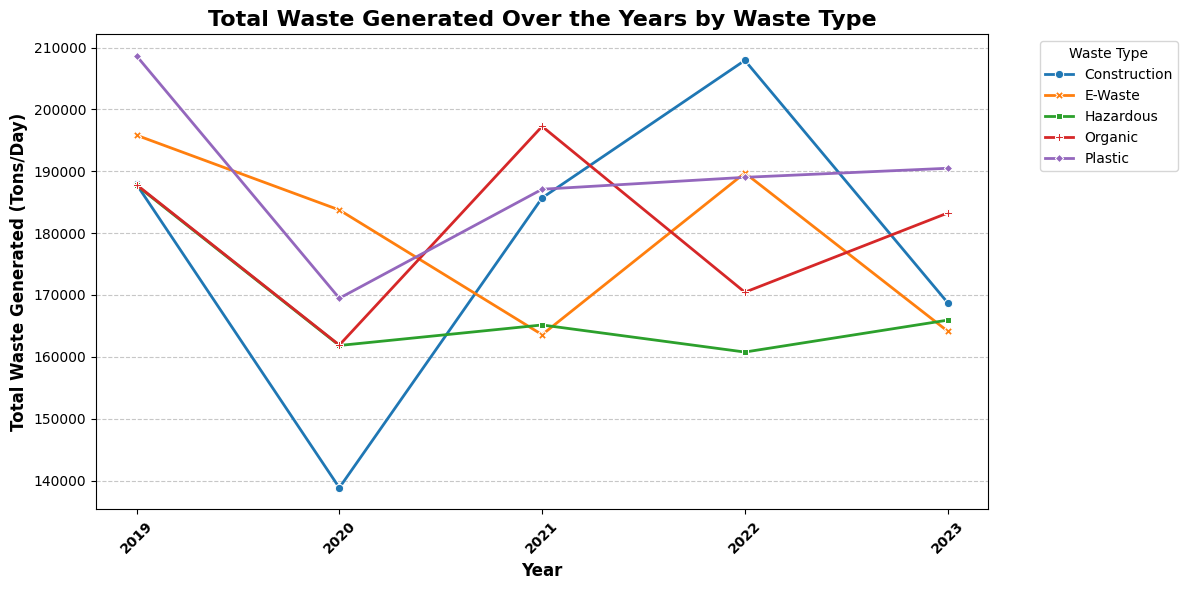

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and pivot
waste_by_year = data.groupby(["Year", "Waste_Type"])["Waste_Generated"].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=waste_by_year, markers=True, dashes=False, linewidth=2)

# Titles and labels
plt.title("Total Waste Generated Over the Years by Waste Type", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12, weight='bold')
plt.ylabel("Total Waste Generated (Tons/Day)", fontsize=12, weight='bold')

# Legend outside plot
plt.legend(title="Waste Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(
    ticks=waste_by_year.index,
    labels=waste_by_year.index.astype(str), 
    rotation=45,
    fontsize=10,
    weight='bold'
)

plt.tight_layout()
plt.show()


There is no clear trend in the data, waste generated by waste type over the years seems to be stationary

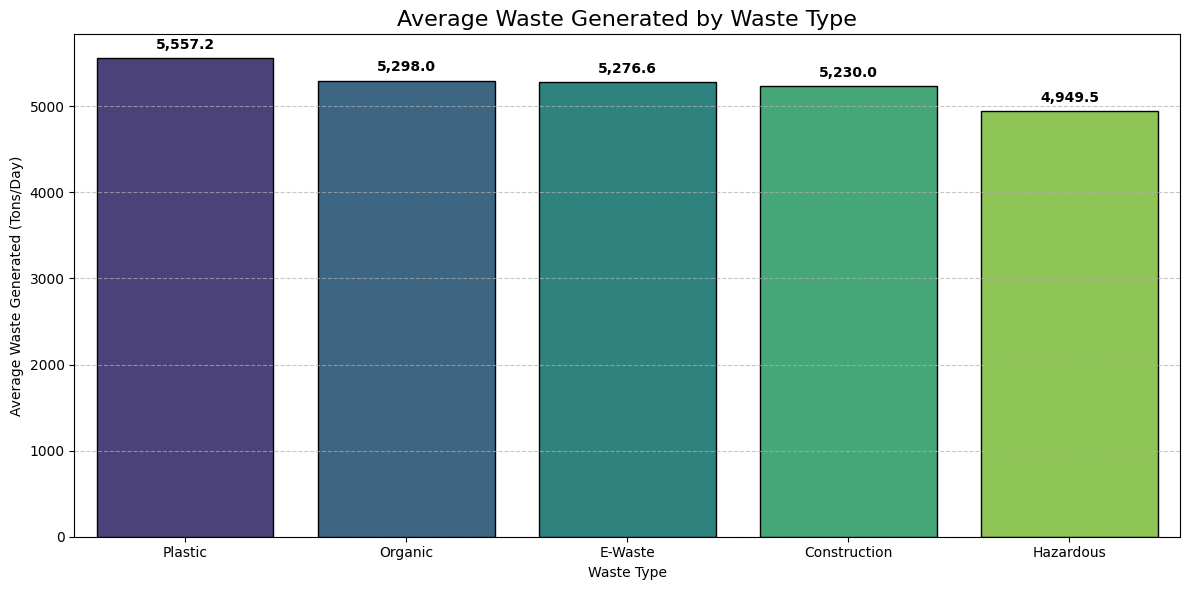

In [20]:

# Group by waste type and sort by mean waste generated
waste_by_type = data.groupby("Waste_Type")["Waste_Generated"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=waste_by_type.index,
    y=waste_by_type.values,
    palette="viridis",
    edgecolor="black"
)

# Titles and labels
plt.title("Average Waste Generated by Waste Type", fontsize=16)
plt.xlabel("Waste Type")
plt.ylabel("Average Waste Generated (Tons/Day)")

# Add value labels
for i, val in enumerate(waste_by_type):
    plt.text(i, val + 0.02 * val, f"{val:,.1f}", ha='center', fontsize=10, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can see that Plastic is the most common type of waste generated on daily basis

*Lets Understand geo spatial trend: How various data points vary across cities*

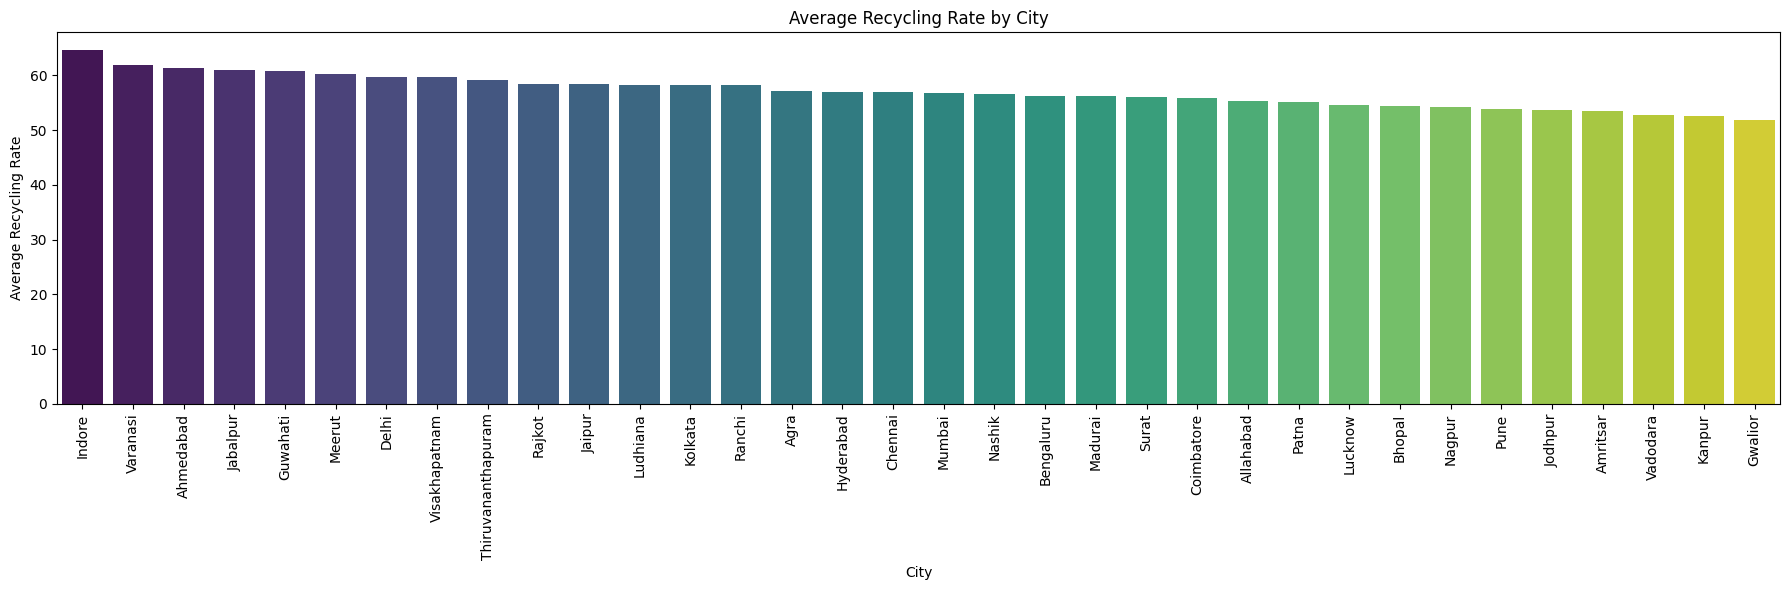

In [21]:
#Average Recycling Rate across the cities

avg_recycling_rate = data.groupby("City")["Recycling_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(18, 6))
sns.barplot(x=avg_recycling_rate.index, y=avg_recycling_rate.values, palette="viridis")
plt.title("Average Recycling Rate by City")
plt.xlabel("City")
plt.ylabel("Average Recycling Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see Indore has the highest recycling rate followed by Varanasi and Ahmedabad, while Gwalior and Kanpur have the lowest.

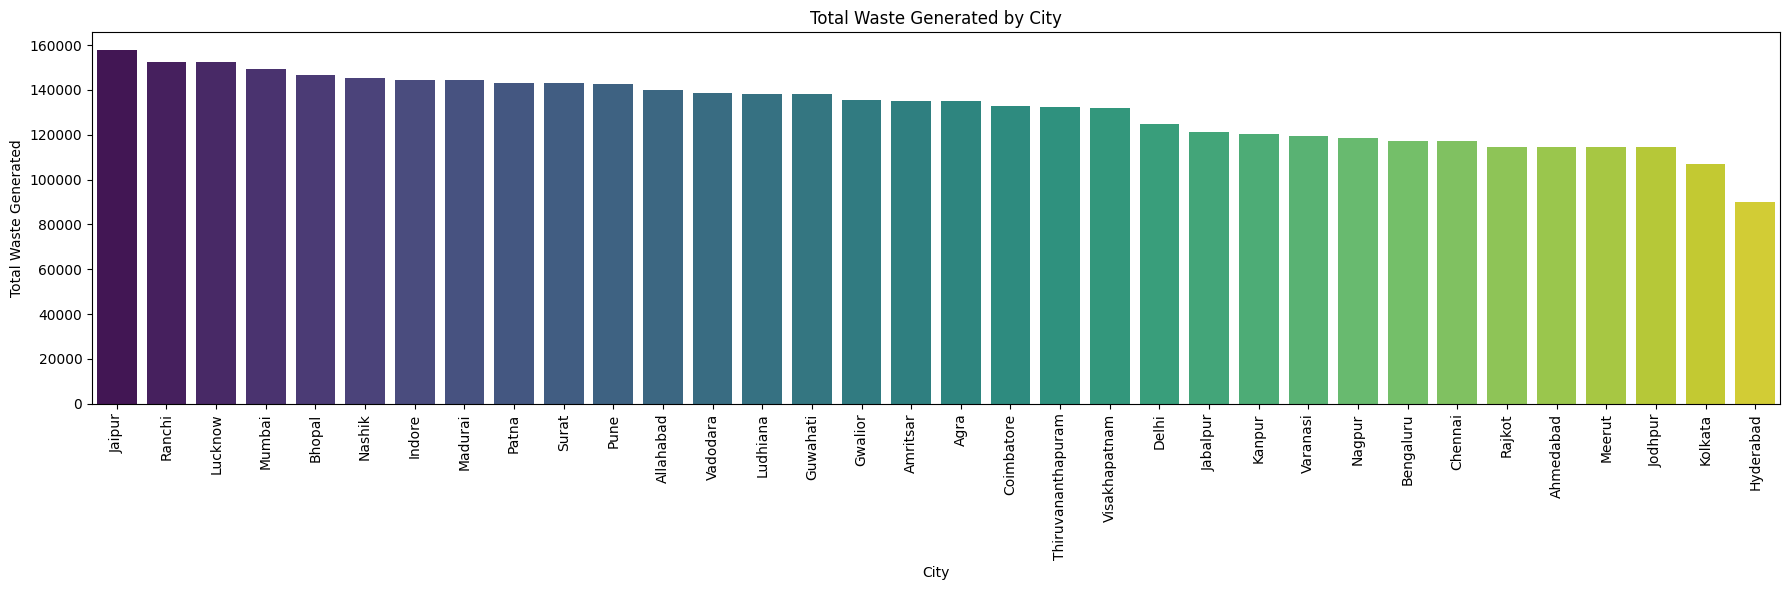

' So Jaipur generates the highest amount of waste per day followed by Ranchi while Hyderabad and Kolkata generates the least'

In [22]:
#Waste Generated by cities

waste_generated = data.groupby("City")["Waste_Generated"].sum().sort_values(ascending=False)
plt.figure(figsize=(18, 6))
sns.barplot(x=waste_generated.index, y=waste_generated.values, palette="viridis")
plt.title("Total Waste Generated by City")
plt.xlabel("City")
plt.ylabel("Total Waste Generated")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

""" So Jaipur generates the highest amount of waste per day followed by Ranchi while Hyderabad and Kolkata generates the least"""

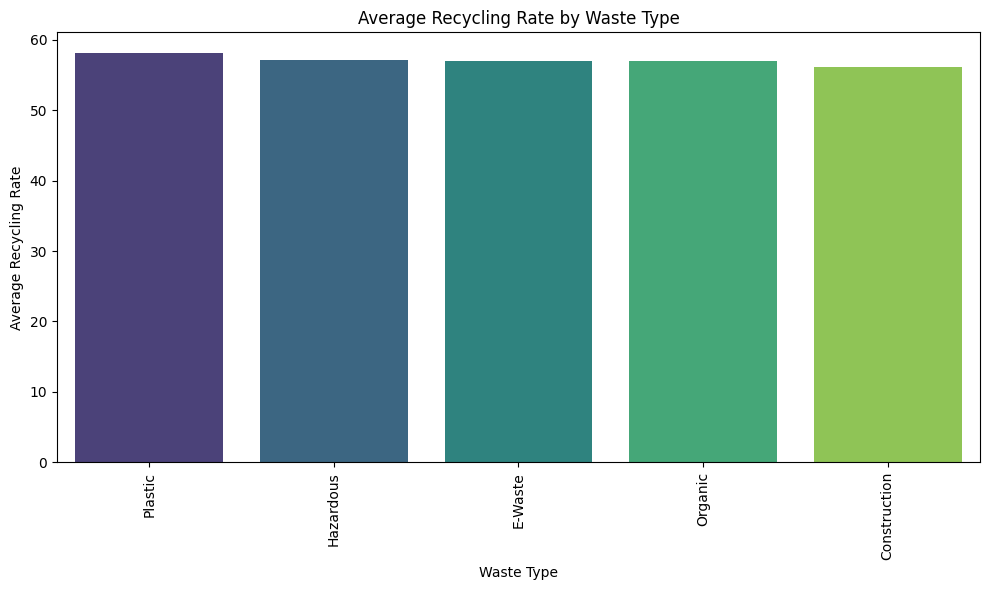

In [23]:
#Recycling Rate by waste type

avg_recycling_rate = data.groupby("Waste_Type")["Recycling_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_recycling_rate.index, y=avg_recycling_rate.values, palette="viridis")
plt.title("Average Recycling Rate by Waste Type")
plt.xlabel("Waste Type")
plt.ylabel("Average Recycling Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Plastic has the highest recycling rate among all other waste type which is as expected, followed by Hazardous as it needs special treatment and can't be handled by any one.

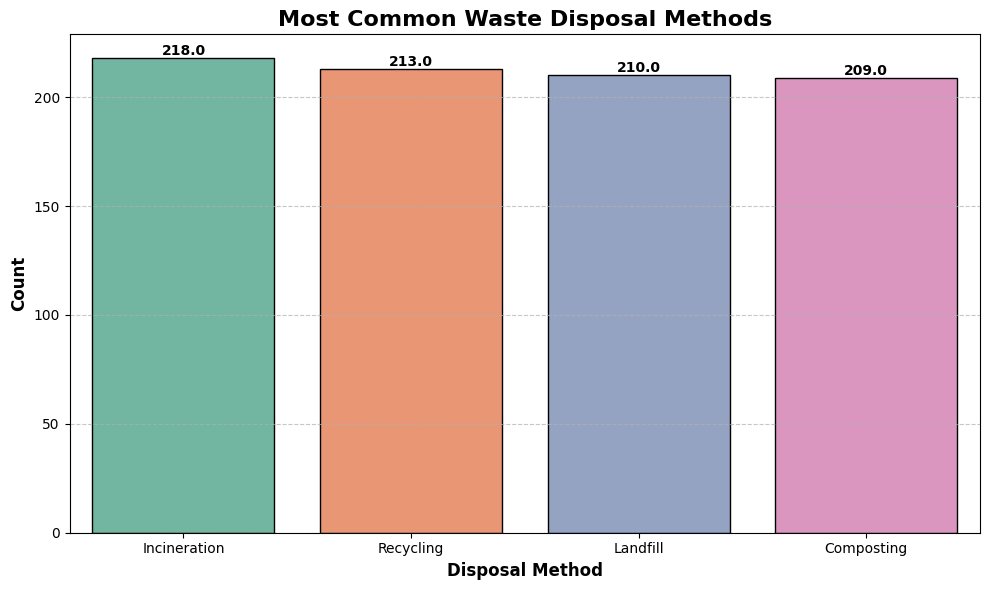

In [24]:
# Plotting the most common waste disposal methods
order = data["Disposal_Method"].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data,
    x="Disposal_Method",
    palette="Set2",
    order=order,
    edgecolor="black"
)

# Title and labels
plt.title("Most Common Waste Disposal Methods", fontsize=16, weight='bold')
plt.xlabel("Disposal Method", fontsize=12, weight='bold')
plt.ylabel("Count", fontsize=12, weight='bold')

for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, weight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


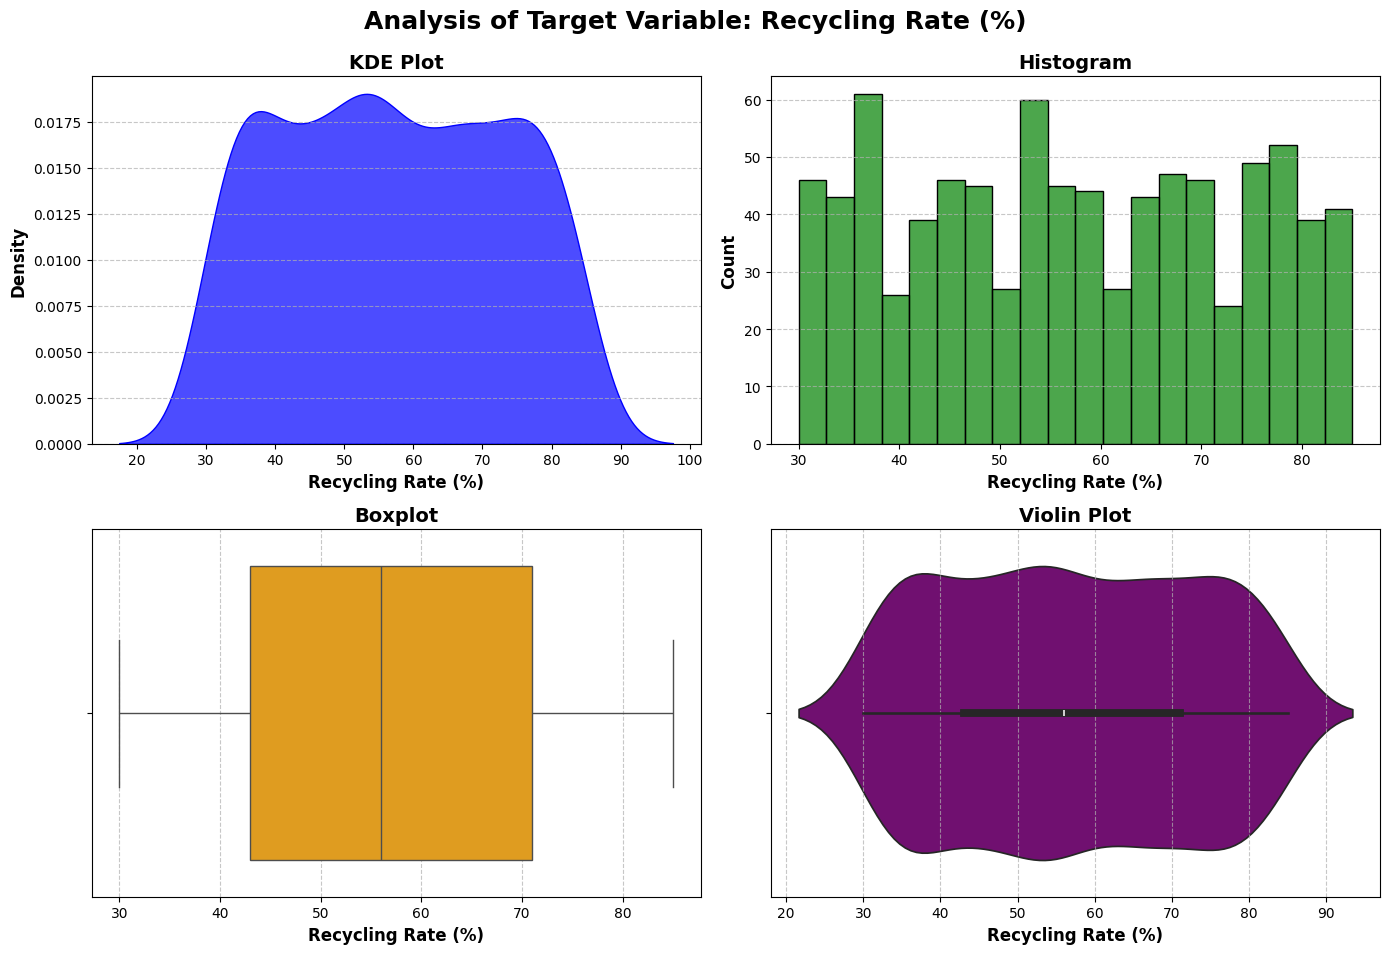

In [25]:
#Analysing Target Variable

plt.figure(figsize=(14, 10))
plt.suptitle("Analysis of Target Variable: Recycling Rate (%)", fontsize=18, weight='bold', y=0.95)

# 1. KDE Plot
plt.subplot(2, 2, 1)
sns.kdeplot(data["Recycling_Rate"], fill=True, color="blue", alpha=0.7)
plt.title("KDE Plot", fontsize=14, weight='bold')
plt.xlabel("Recycling Rate (%)", fontsize=12, weight='bold')
plt.ylabel("Density", fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Histogram
plt.subplot(2, 2, 2)
sns.histplot(data["Recycling_Rate"], bins=20, color="green", alpha=0.7, edgecolor="black")
plt.title("Histogram", fontsize=14, weight='bold')
plt.xlabel("Recycling Rate (%)", fontsize=12, weight='bold')
plt.ylabel("Count", fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=data["Recycling_Rate"], color="orange")
plt.title("Boxplot", fontsize=14, weight='bold')
plt.xlabel("Recycling Rate (%)", fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 4. Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(x=data["Recycling_Rate"], color="purple")
plt.title("Violin Plot", fontsize=14, weight='bold')
plt.xlabel("Recycling Rate (%)", fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Analysing Recycling Rate
* Distribution is majorly symmetrical with visible small peaks refering that recycling rate might be have few different ranges
* Data is non skewed and free from outliers.
* Broad top indicates that values are uniformly distributed in a range from 30 to 80.



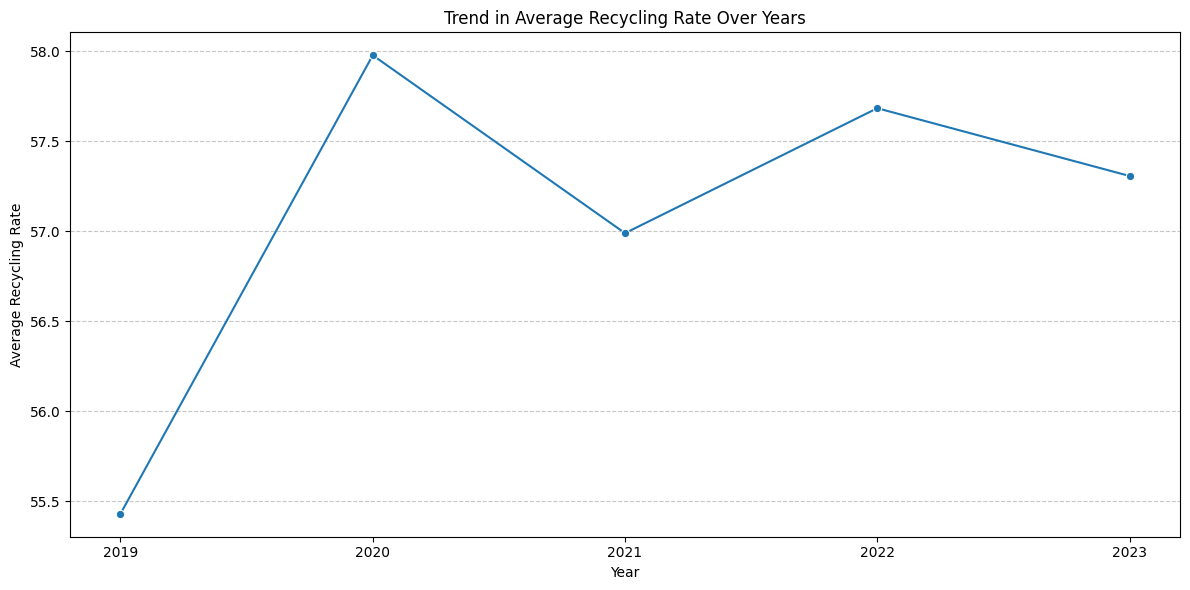

In [26]:
#Analysing trend in recycling rate
trend = data.groupby("Year")["Recycling_Rate"].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.title("Trend in Average Recycling Rate Over Years")
plt.xlabel("Year")
plt.ylabel("Average Recycling Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([2019, 2020, 2021, 2022, 2023])
plt.tight_layout()
plt.show()

We see that after 2019 there is a substantial improvement in average recyling rate but after that the recycling rate seems to plateau.
However we can notice that there is somewhat negative trend between years, as recycling rate increases a year then falls down a bit and then again increases. But overall the fluctuations are not major.

In [27]:
import folium
city_coords = {
    'Mumbai': (19.08, 72.88),
    'Delhi': (28.65, 77.23),
    'Bengaluru': (12.97, 77.59),
    'Chennai': (13.08, 80.27),
    'Kolkata': (22.57, 88.36),
    'Hyderabad': (17.39, 78.49),
    'Pune': (18.52, 73.86),
    'Ahmedabad': (23.02, 72.57),
    'Jaipur': (26.91, 75.79),
    'Lucknow': (26.85, 80.95),
    'Surat': (21.17, 72.83),
    'Kanpur': (26.47, 80.33),
    'Nagpur': (21.15, 79.08),
    'Patna': (25.59, 85.14),
    'Bhopal': (23.26, 77.41),
    'Thiruvananthapuram': (8.52, 76.94),
    'Indore': (22.72, 75.88),
    'Vadodara': (22.31, 73.18),
    'Guwahati': (26.18, 91.75),
    'Coimbatore': (11.02, 76.96),
    'Ranchi': (23.34, 85.31),
    'Amritsar': (31.63, 74.87),
    'Jodhpur': (26.28, 73.02),
    'Varanasi': (25.32, 82.97),
    'Ludhiana': (30.90, 75.85),
    'Agra': (27.18, 78.01),
    'Meerut': (28.98, 77.71),
    'Nashik': (20.00, 73.78),
    'Rajkot': (22.30, 70.80),
    'Madurai': (9.93, 78.12),
    'Jabalpur': (23.17, 79.94),
    'Allahabad': (25.44, 81.85),
    'Visakhapatnam': (17.69, 83.22),
    'Gwalior': (26.22, 78.18),
}

# Create a map centered on India
india_map = folium.Map(location=[23.0, 78.0], zoom_start=5)  # Adjusted center and zoom for India

# Add markers for each city
for city, (lat, lon) in city_coords.items():
    folium.Marker(
        location=[lat, lon],
        popup=f"City: {city}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(india_map)

# Display the map
india_map

* The map of India here doesn't reprsent the Kashmir and POKs correctly. But we can represent given coordinates correctly.
* We can see the location of all the landfills mentioned in the dataset on the map of India. 
* Data is collected uniformly from all the parts and doesn't show any bias.
